<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Projet Data Science</h1></center>
<center><h2>Voynich</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote>
    
</blockquote>

* importer <code>pandas</code> et charger le jeu de données
* afficher les 5 premières lignes    

In [8]:
# Insérer le code ici
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
file = open("voynich.txt", "r") 
txt = file.read()
file.close()

mots = txt.split(" ")
print("Nombre de mots : ", len(mots))


Nombre de mots :  37887


In [11]:
# Insérer le code ici
def frequenceMot(mots):
    mot_unique = {}
    for mot in mots:
        if mot in mot_unique :
            mot_unique[mot] += 1
        else:
            mot_unique[mot] = 1
    
    df = pd.DataFrame.from_dict(mot_unique, orient='index')
    df['mot'] = df.index
    df['count'] = df[0].astype('int')
    df['longueur'] = df['mot'].apply(lambda m: len(m))
    df = df.reset_index().drop(['index', 0], axis=1)
    return df

import time
t1 = time.perf_counter()
df = frequenceMot(mots)
t2 = time.perf_counter()

print("Nombre de mots différents : ", len(df), f"en {t2 - t1:0.4f} secondes")

df = df.sort_values(by='count', ascending=False)
df.head(10)



Nombre de mots différents :  8079 en 0.0638 secondes


,mot,count,longueur
31,daiin,864,5
63,ol,538,2
1486,chedy,501,5
345,aiin,470,4
1499,shedy,427,5
84,chol,397,4
12,or,366,2
2,ar,352,2
118,chey,344,4
135,dar,319,3


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 31 to 8078
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mot       8079 non-null   object
 1   count     8079 non-null   int32 
 2   longueur  8079 non-null   int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 220.9+ KB


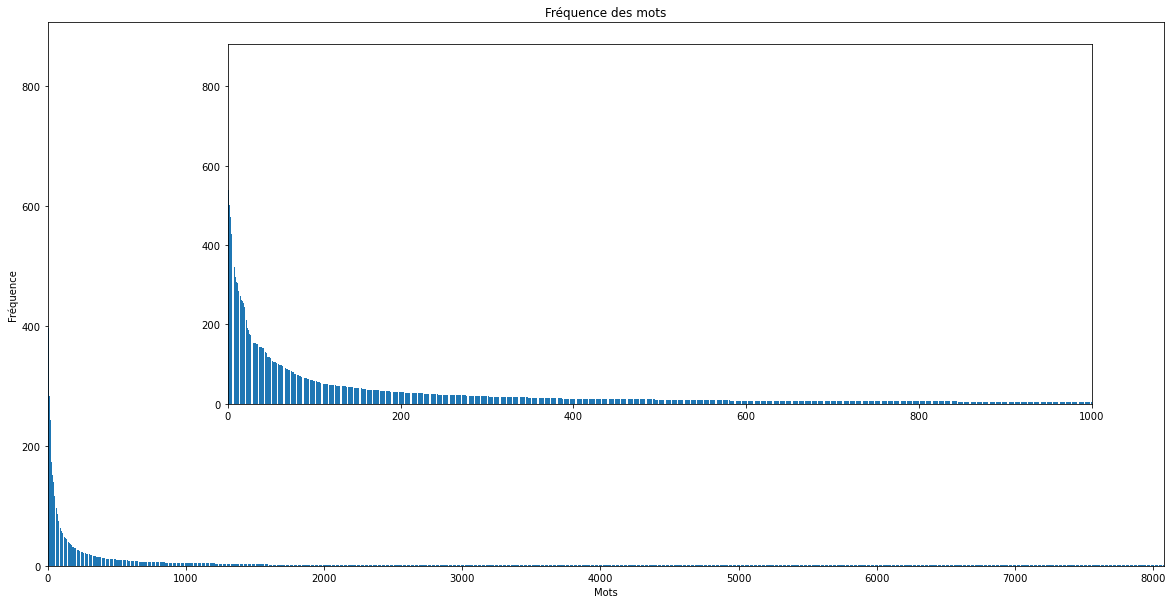

In [20]:
df = df.sort_values(by='count', ascending=False)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(df)), height=df['count'])
#plt.xticks(range(len(df)), df.mot)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Fréquence des mots')
plt.xlim(0, 8079)
#plt.xticks([])
#plt.yticks([])
#plt.ylim(0, 400)
#plt.legend()
#plt.show()

plt.axes([0.25,0.35,0.6,0.5])
plt.bar(range(len(df)), height=df['count'])
plt.xlim(0, 1000)
    
plt.show()

In [19]:
import seaborn as sns

sns.histplot(df['count'], col="Fréquence", row="Mots")

AttributeError: module 'seaborn' has no attribute 'histplot'

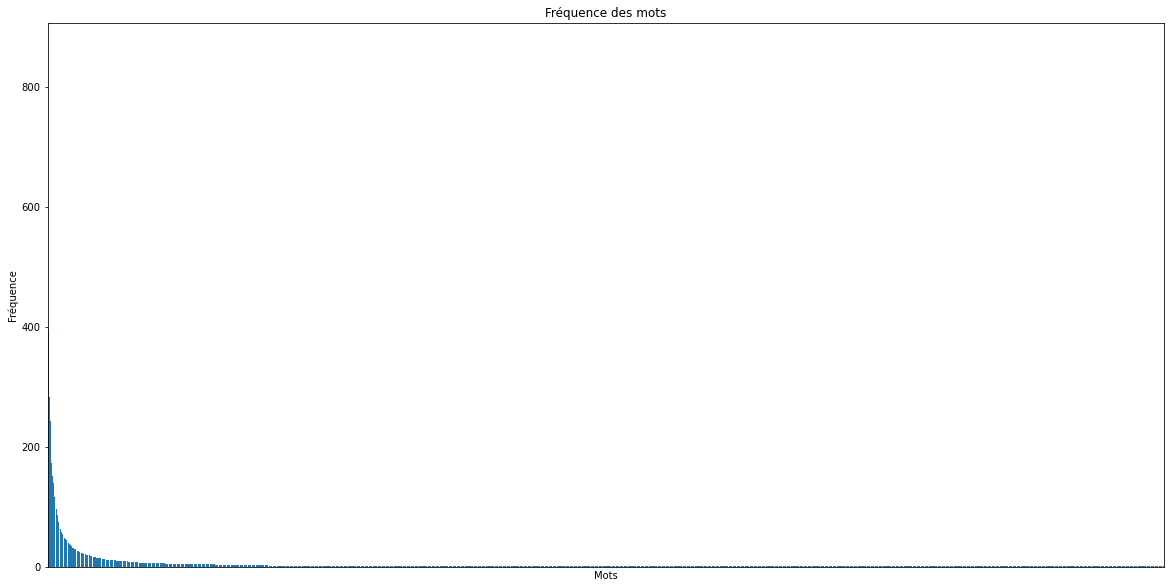

In [22]:
fig = plt.figure(figsize=(20,10))
plt.bar(range(len(df)), height=df['count'])
plt.xticks([])
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Fréquence des mots')
plt.xlim(0, 8079)
plt.show()

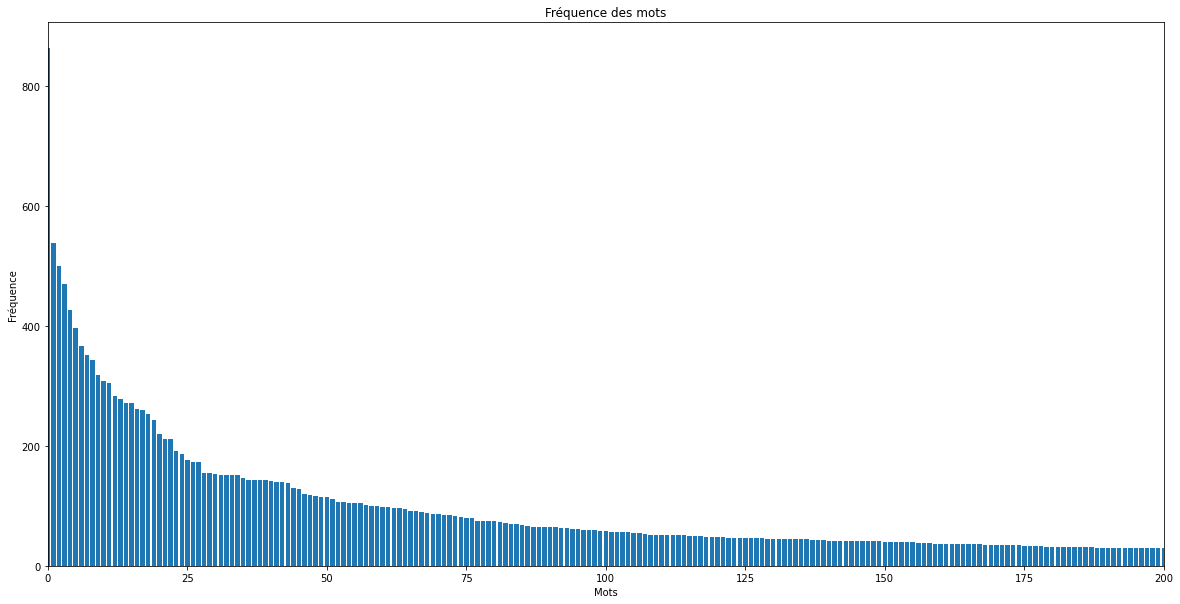

In [18]:
plt.figure(figsize=(20,10))
plt.bar(range(len(df)), height=df['count'])
#plt.xticks(range(len(df)), df.mot)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Fréquence des mots')
plt.xlim(0, 200)
#plt.ylim(0, 400)
#plt.legend()
plt.show()

In [16]:
def deuxMots(mots):
    result = []
    mot1 = ''
    mot2 = ''
    for mot in mots:
        mot2 = mot1
        mot1 = mot
        if mot1 != '' and mot2 != '':
            result.append(mot2 + ' ' + mot1)
    return result

def troisMots(mots):
    result = []
    mot1 = ''
    mot2 = ''
    mot3 = ''
    for mot in mots:
        mot3 = mot2
        mot2 = mot1
        mot1 = mot
        if mot1 != '' and mot2 != '' and mot3 != '':
            result.append(mot3 + ' ' + mot2 + ' ' + mot1)
    return result

df_f2m = frequenceMot(deuxMots(mots))
df_f2m = df_f2m.sort_values(by='count', ascending=False)
df_f2m.head(10)
        

,mot,count
1650,or aiin,53
279,chol daiin,35
561,s aiin,32
5797,ar al,24
4612,ar aiin,24
113,chol chol,22
13419,ol shedy,21
4521,shedy qokedy,21
6037,ol chedy,21
861,daiin daiin,20


In [17]:
df_f3m = frequenceMot(troisMots(mots))
df_f3m = df_f3m.sort_values(by='count', ascending=False)
df_f3m.head(10)


,mot,count
15115,ol shedy qokedy,5
10064,v x k,4
10060,o l d,4
19392,chey qol chedy,4
10061,l d r,4
10062,d r v,4
10063,r v x,4
9707,ol s aiin,4
10069,t r y,4
10070,r y c,4


In [91]:

df.head()


,mot,count,longeur
31,daiin,864,5
63,ol,538,2
1486,chedy,501,5
345,aiin,470,4
1499,shedy,427,5


In [115]:
df = df.sort_values(by='longueur', ascending=False)
df.head(10)


,mot,count,longueur
5628,ypchocpheosaiin,1,15
3913,ooooooooolarsr,1,14
7811,cheoltchedaiin,1,14
3716,chesokeeoteody,1,14
1198,otcholcheaiin,1,13
7667,cheodoiidaiin,1,13
2927,chotcheytchol,1,13
7884,cheopolteeedy,1,13
1507,shapchedyfeey,1,13
4388,cheteeeosaiin,1,13


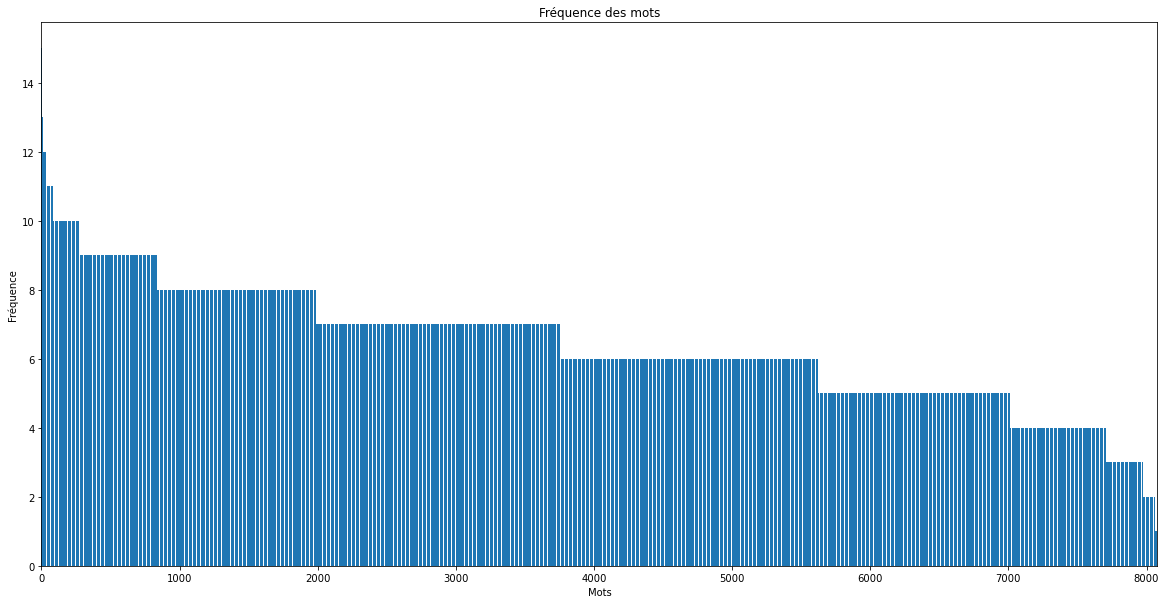

In [116]:
plt.figure(figsize=(20,10))
plt.bar(range(len(df)), height=df['longueur'])
#plt.xticks(range(len(df)), df.mot)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title('Fréquence des mots')
plt.xlim(0, 8079)
#plt.legend()
plt.show()

6     1861
7     1770
5     1392
8     1148
4      698
9      567
3      266
10     190
2       84
11      46
12      25
1       19
13       8
14       3
15       1
0        1
Name: longueur, dtype: int64


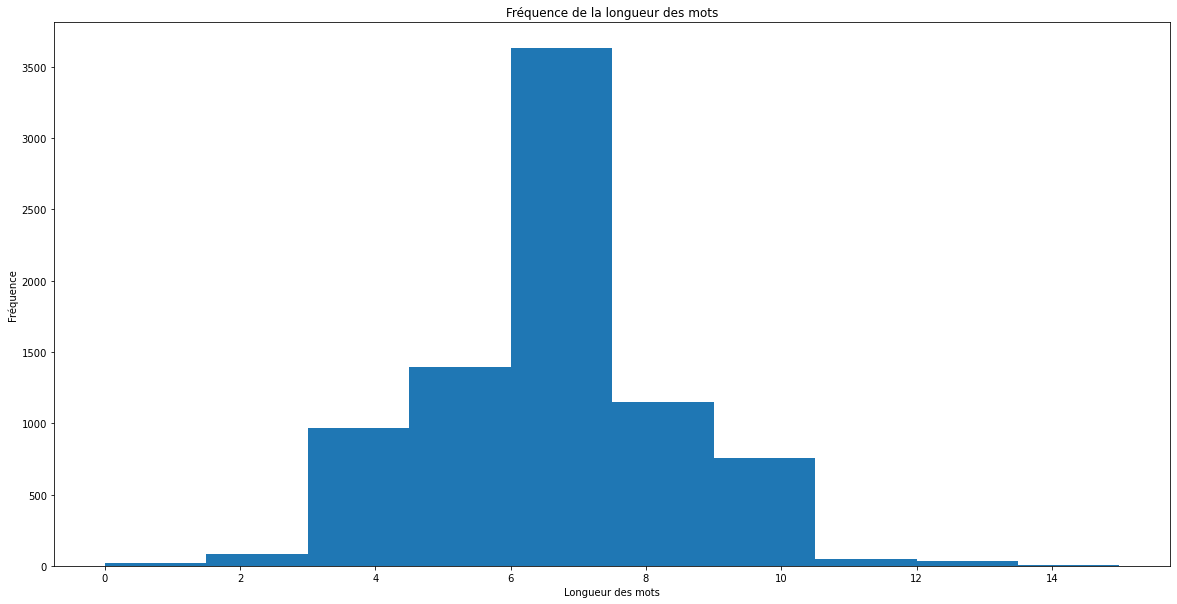

In [28]:
print(df['longueur'].value_counts())

plt.figure(figsize=(20,10))
plt.hist(df['longueur'])
plt.xlabel('Longueur des mots')
plt.ylabel('Fréquence')
plt.title('Fréquence de la longueur des mots')
plt.show()